In [1]:
import numpy as np
import torch
from train_glm import train_glm
import matplotlib.pyplot as plt

In [2]:
base_dir = "/media/hdd01/sklee/"
experiment = "random"
cell_type = "CA1"

E_neural_file = "Espikes_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_Er1_Ir7.5_random_NR_neural.npy"
I_neural_file = "Ispikes_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_Er1_Ir7.5_random_NR_neural.npy"
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_Er1_Ir7.5_random_NR_rep16_stimseed1.npy"
C_syn_e_file = "handsub6_C_syn_e.npy"
C_syn_i_file = "handsub6_C_syn_i.npy"
C_den_file = "handsub6_C_den.npy"


E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:10000].flatten()
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
V = torch.from_numpy(V)
C_den = torch.from_numpy(C_den)

In [3]:
model_type = "alpha_cos"
T_train = 65000
T_test = 15000
T_no = 150
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")
sparse_no = 0

if model_type == "alpha":
    batch_size = 60000
    iter_no = 10000
    epoch_no = 5
    lr = 0.004
elif model_type == "alpha_cos":
    batch_size = 2500
    iter_no = 20000
    epoch_no = 5
    lr = 0.0007

In [ ]:
train_glm(model_type, V, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, iter_no, epoch_no, C_den, C_syn_e, C_syn_i, 
                sparse_no, device, lr, save_dir)

0 4.922104845039854e-06 3.0 1.0
50 -0.0020187315259652117 3.001312255859375 1.0144490003585815
100 -0.0017610954738385143 3.0027248859405518 1.0150690078735352
150 0.011937723240112552 3.006558895111084 1.0182116031646729
200 -0.00022442467199645932 3.015183925628662 1.0294172763824463
250 0.004488289194196526 3.018561601638794 1.0305930376052856
300 0.007256122972998269 3.018662452697754 1.0305782556533813
350 0.009174633944829425 3.0188863277435303 1.030766248703003
400 0.011111806360676879 3.0187084674835205 1.0307811498641968
450 0.02936007057767176 3.01884126663208 1.0307260751724243
500 0.1594779157959012 3.0182864665985107 1.0305272340774536
550 0.20072824808870204 3.017458438873291 1.0298649072647095
600 0.22659883839652184 3.017871856689453 1.0301355123519897
650 0.2469453981333425 3.0183870792388916 1.0307737588882446
700 0.26402057257645983 3.0190412998199463 1.0314136743545532
750 0.2788789394026562 3.0197155475616455 1.0321588516235352
800 0.2894332946148861 3.020581245422

In [5]:
output = np.load("/media/hdd01/sklee/CA1_random/alpha_output.npz")

In [6]:
for x in output.files:
    print(x)

test
C_syn_e
C_syn_i
filters


In [7]:
test = output["test"]
C_syn_e = output["C_syn_e"]
C_syn_i = output["C_syn_i"]
filters = output["filters"]

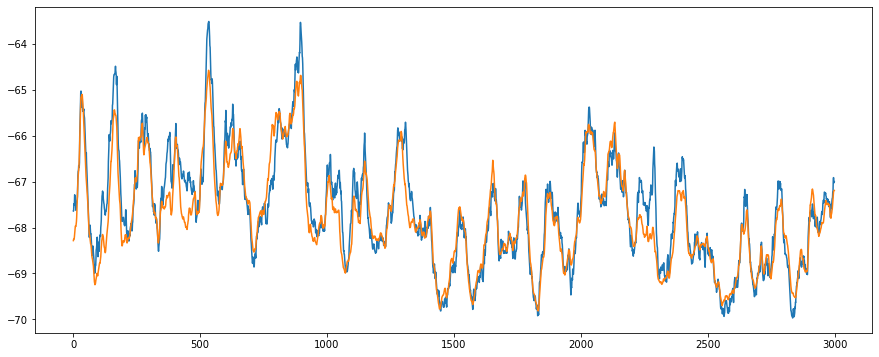

In [8]:
plt.figure(figsize = (15,6))
plt.plot(V[65000:80000][:3000])
plt.plot(test[:3000])

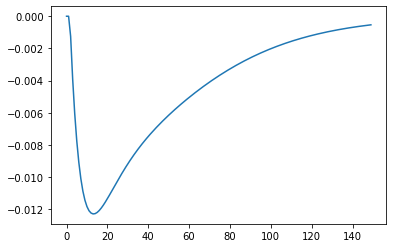

In [21]:
plt.plot(filters[9])